In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

In [2]:
result_comparison = pd.read_csv('./metrics_comparison.csv', index_col=0)

result_comparison_mean = pd.DataFrame(result_comparison.groupby(
    ['Model', 'Metrics'])['Value'].mean()).reset_index()
result_comparison_mean

,Model,Metrics,Value
0,Boosting classiﬁer (AdaBoost),accuracy,0.89775
1,Boosting classiﬁer (AdaBoost),f1,0.89750
2,Boosting classiﬁer (AdaBoost),precision,0.99600
3,Boosting classiﬁer (AdaBoost),recall,0.80725
4,K-nearest neighbors (KNN),accuracy,0.77450
5,K-nearest neighbors (KNN),f1,0.77350
6,K-nearest neighbors (KNN),precision,0.99650
7,K-nearest neighbors (KNN),recall,0.65250
8,Linear SVM (LSVM),accuracy,0.89825
9,Linear SVM (LSVM),f1,0.89800


In [3]:
result_comparison

,Model,DataSet,Metrics,Value
0,K-nearest neighbors (KNN),DS1,accuracy,0.795
1,K-nearest neighbors (KNN),DS2,accuracy,0.764
2,K-nearest neighbors (KNN),DS3,accuracy,0.768
3,K-nearest neighbors (KNN),DS4,accuracy,0.771
4,K-nearest neighbors (KNN),DS1,precision,0.993
...,...,...,...,...
107,Boosting classiﬁer (AdaBoost),DS4,recall,0.789
108,Boosting classiﬁer (AdaBoost),DS1,f1,0.913
109,Boosting classiﬁer (AdaBoost),DS2,f1,0.891
110,Boosting classiﬁer (AdaBoost),DS3,f1,0.898


(0.6, 1.0)

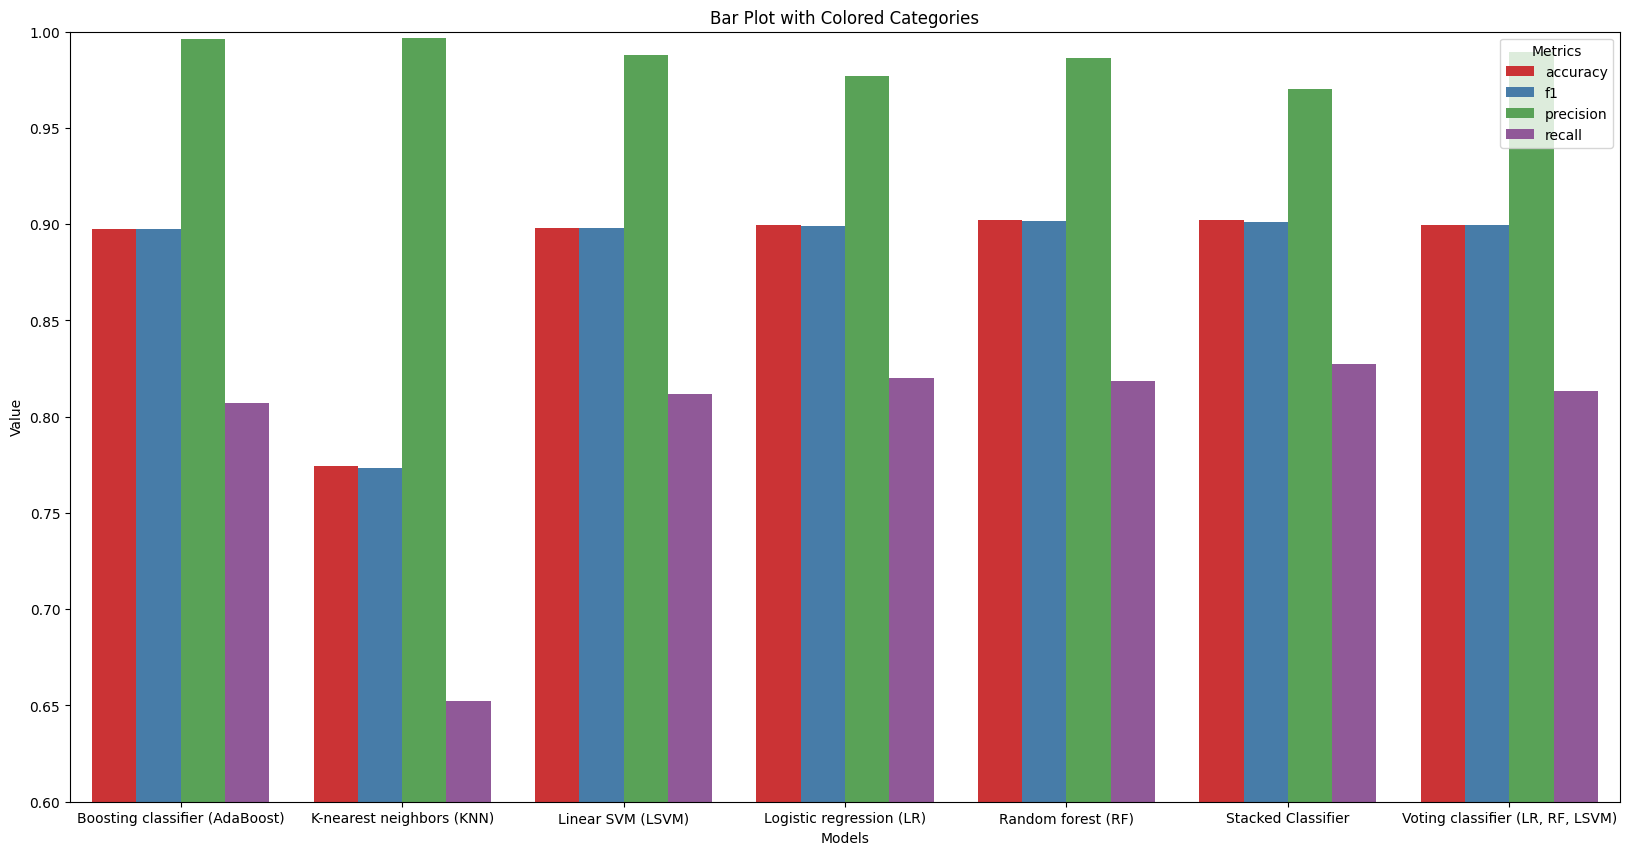

In [4]:
import seaborn as sns

plt.figure(figsize=(20, 10))
# Create a bar plot with colored categories
sns.barplot(x='Model', y='Value', 
            data=result_comparison_mean, hue='Metrics',
            palette=sns.color_palette("Set1"))
# Set plot title and labels
plt.title('Bar Plot with Colored Categories')
plt.xlabel('Models')
plt.ylabel('Value')

plt.ylim(0.6, 1)

In [5]:
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
result_comparison_directory = dict()

In [6]:

for metrics in metrics_names:
    result_comparison_entry = result_comparison[result_comparison['Metrics'] == metrics].drop(columns = 'Metrics') 
    result_comparison_entry = result_comparison_entry.pivot(index='Model', columns='DataSet', values='Value')
    result_comparison_entry.reset_index(inplace=True)
    result_comparison_entry.columns.name = None
    result_comparison_entry.name = metrics
    result_comparison_directory[metrics] = result_comparison_entry

In [7]:
for metrics in metrics_names:
    print(metrics)
    display(result_comparison_directory[metrics])

accuracy


,Model,DS1,DS2,DS3,DS4
0,Boosting classiﬁer (AdaBoost),0.914,0.891,0.898,0.888
1,K-nearest neighbors (KNN),0.795,0.764,0.768,0.771
2,Linear SVM (LSVM),0.909,0.892,0.900,0.892
3,Logistic regression (LR),0.912,0.894,0.898,0.894
4,Random forest (RF),0.916,0.897,0.901,0.894
5,Stacked Classifier,0.911,0.899,0.903,0.895
6,"Voting classiﬁer (LR, RF, LSVM)",0.911,0.893,0.902,0.893


precision


,Model,DS1,DS2,DS3,DS4
0,Boosting classiﬁer (AdaBoost),0.993,0.993,0.998,1.000
1,K-nearest neighbors (KNN),0.993,0.998,0.995,1.000
2,Linear SVM (LSVM),0.978,0.986,0.993,0.995
3,Logistic regression (LR),0.969,0.976,0.977,0.986
4,Random forest (RF),0.988,0.986,0.986,0.986
5,Stacked Classifier,0.959,0.974,0.968,0.981
6,"Voting classiﬁer (LR, RF, LSVM)",0.981,0.986,0.995,0.995


recall


,Model,DS1,DS2,DS3,DS4
0,Boosting classiﬁer (AdaBoost),0.832,0.798,0.810,0.789
1,K-nearest neighbors (KNN),0.671,0.641,0.651,0.647
2,Linear SVM (LSVM),0.832,0.803,0.815,0.797
3,Logistic regression (LR),0.843,0.811,0.821,0.805
4,Random forest (RF),0.838,0.811,0.820,0.805
5,Stacked Classifier,0.847,0.820,0.834,0.809
6,"Voting classiﬁer (LR, RF, LSVM)",0.834,0.804,0.817,0.799


f1


,Model,DS1,DS2,DS3,DS4
0,Boosting classiﬁer (AdaBoost),0.913,0.891,0.898,0.888
1,K-nearest neighbors (KNN),0.795,0.763,0.766,0.770
2,Linear SVM (LSVM),0.908,0.892,0.900,0.892
3,Logistic regression (LR),0.911,0.893,0.898,0.894
4,Random forest (RF),0.915,0.897,0.901,0.894
5,Stacked Classifier,0.910,0.898,0.903,0.894
6,"Voting classiﬁer (LR, RF, LSVM)",0.910,0.893,0.902,0.893
